<a href="https://colab.research.google.com/github/helloitsmimi/helloitsmimi/blob/master/%EC%9D%B4%EB%8F%99%EB%8D%B0%EC%9D%B4%ED%84%B0%2C_%EB%A7%A4%EC%B6%9C%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%83%81%EA%B4%80%EA%B4%80%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 설명
## 통신 모바일 인구이동량 통계
- 7. 입지유형별_피벗
  - 상업지역, 관광지, 대형아울렛, 사무지역, 레저스포츠, 주거지등
  - 2019.01.1주차 ~ 2022.04.3주차 주별 이동량 합계 데이터
- 8. 시도별_피벗
  - 서울, 부산, 대구, 인천, 광주, 대전, 울산, 세종, 경기, 강원, 충북, 충남, 전북, 전남, 경북, 경남, 제주
  - 2019.01.1주차 ~ 2022.04.3주차 주별 이동량 합계 데이터

## 신용카드 지역별 월간일평균 데이터(원단위)
- 서울, 부산, 대구, 인천, 광주, 대전, 울산, 경기, 강원, 충북, 충남, 전북, 전남, 경북, 경남, 제주, 기타 <- 기타 뭐임?
- 2019.01 ~ 2022.01 사업별 월별 일평균 매출 데이터

- 거리두기 on : 2020년 3월 ~ 2022년 1월
- 거리두기 off : 2019년 1월 ~ 2020년 2월

# 분석 방향 : 인구이동량 - 매출 간 상관관계 찾기
1. 거리두기 전/후 같은 지역에서 매출 변화 있는지
  - 매출 변화 있다면 해당 지역의 인구이동량은 얼마나 되는지
  - 관광지 : 매출액 줄어든 경우, 인구이동량과 매출액 간 상관관계 있는지

2. 은아님께 넘겨줘야 할 방향 : 인구이동량 - 매출 간 상관관계가 **있다**
  - 시도별 이동량-매출 상관관계 회귀그래프 그리기
    - 거리두기 기간 내 이동량, 매출 회귀그래프 : 이동량이 매출량을 추정하는데 유의한 변수라는 결론 도출하기
    - corr이나 heatmap 그리려고 해도 데이터 가공이 필요할 듯
  - 월별 매출/이동량 시계열 그래프


## 거리두기 전/후 지역별 매출 변화와 인구이동량의 상관관계 살펴보기

### 데이터 전처리
신용카드 월간일평균 매출데이터

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconf

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

In [ ]:
import pandas as pd

sales = pd.read_csv("/content/신용카드 지역별_월간일평균_데이터(원단위).csv", thousands = ',', encoding='cp949')
sales.tail()

,통계표,항목명1,항목명2,항목명3,단위,변환,2019/01,2019/02,2019/03,2019/04,...,2021/04,2021/05,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01
542,5.8.2 지역별 소비유형별 개인 신용카드,기타,금융/보험,월간 일평균,원,원자료,454292859.0,451036139.0,486427582.0,438039780.0,...,388132078.0,368804093.0,380146057.0,389708664.0,342436874.0,367100441.0,336365608.0,311582587.0,350425209.0,313145715.0
543,5.8.2 지역별 소비유형별 개인 신용카드,기타,기타,월간 일평균,원,원자료,564220463.0,490349789.0,509714433.0,532892934.0,...,397590437.0,369857355.0,379084197.0,424782765.0,329172222.0,366821291.0,316186275.0,333581772.0,320778952.0,373026786.0
544,5.8.2 지역별 소비유형별 개인 신용카드,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
545,통계담당 : 한국은행 금융결제국 결제안정팀(02-750-6657),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
546,주 : 지역별(가맹점 소재지 기준) 소비유형별 개인 신용카드 실적은 실승인실적 기준...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 데이터 살펴보기
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 43 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   통계표      547 non-null    object 
 1   항목명1     544 non-null    object 
 2   항목명2     544 non-null    object 
 3   항목명3     544 non-null    object 
 4   단위       544 non-null    object 
 5   변환       544 non-null    object 
 6   2019/01  544 non-null    float64
 7   2019/02  544 non-null    float64
 8   2019/03  544 non-null    float64
 9   2019/04  544 non-null    float64
 10  2019/05  544 non-null    float64
 11  2019/06  544 non-null    float64
 12  2019/07  544 non-null    float64
 13  2019/08  544 non-null    float64
 14  2019/09  544 non-null    float64
 15  2019/10  544 non-null    float64
 16  2019/11  544 non-null    float64
 17  2019/12  544 non-null    float64
 18  2020/01  544 non-null    float64
 19  2020/02  544 non-null    float64
 20  2020/03  544 non-null    float64
 21  2020/04  544 non

In [ ]:
sales[:-3].describe()

,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,...,2021/04,2021/05,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01
count,5.440000e+02,5.440000e+02,5.440000e+02,5.440000e+02,5.440000e+02,5.440000e+02,5.440000e+02,5.440000e+02,5.440000e+02,5.440000e+02,...,5.440000e+02,5.440000e+02,5.440000e+02,5.440000e+02,5.440000e+02,5.440000e+02,5.440000e+02,5.440000e+02,5.440000e+02,5.440000e+02
mean,5.329231e+09,5.110526e+09,5.277144e+09,5.342063e+09,5.468367e+09,5.342469e+09,5.480505e+09,5.369432e+09,5.382533e+09,5.526458e+09,...,6.001284e+09,6.074426e+09,6.153175e+09,6.236158e+09,5.938812e+09,6.214518e+09,6.341273e+09,6.596492e+09,6.403405e+09,6.468156e+09
std,3.459781e+10,3.251976e+10,3.357148e+10,3.447797e+10,3.516128e+10,3.473067e+10,3.655355e+10,3.459031e+10,3.563280e+10,3.673634e+10,...,4.260817e+10,4.287328e+10,4.359439e+10,4.477467e+10,4.187035e+10,4.404577e+10,4.435825e+10,4.666159e+10,4.605683e+10,4.692492e+10
min,-2.783860e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.346300e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.022500e+04,-1.696500e+04,0.000000e+00,-9.475970e+05,0.000000e+00,0.000000e+00
25%,1.227651e+08,1.135811e+08,1.250948e+08,1.200505e+08,1.234784e+08,1.167720e+08,1.098467e+08,1.105715e+08,1.157331e+08,1.153161e+08,...,9.232292e+07,9.710742e+07,9.427468e+07,9.305048e+07,8.785106e+07,1.101429e+08,1.074330e+08,9.902635e+07,9.569655e+07,9.730510e+07
50%,6.051253e+08,5.942791e+08,6.006800e+08,6.041199e+08,6.444076e+08,6.085482e+08,6.117023e+08,5.893497e+08,6.149608e+08,6.258146e+08,...,5.457457e+08,5.667834e+08,5.813018e+08,5.869172e+08,5.329310e+08,5.841645e+08,6.149602e+08,6.019062e+08,5.911339e+08,5.761569e+08
75%,1.755472e+09,1.721783e+09,1.807828e+09,1.823128e+09,1.906445e+09,1.838854e+09,1.862635e+09,1.905246e+09,1.775241e+09,1.899756e+09,...,1.835681e+09,1.812515e+09,1.935973e+09,1.848110e+09,1.869910e+09,1.954595e+09,2.005220e+09,2.003188e+09,1.871695e+09,1.968516e+09
max,6.924026e+11,6.461317e+11,6.644611e+11,6.895258e+11,7.077614e+11,7.023558e+11,7.437419e+11,6.987391e+11,7.220867e+11,7.461021e+11,...,8.590723e+11,8.603034e+11,8.789980e+11,9.034594e+11,8.365540e+11,8.808657e+11,8.840144e+11,9.325143e+11,9.246145e+11,9.437860e+11


In [ ]:
# 마지막 3행 제외
sales = sales[:-3]
sales.tail()

,통계표,항목명1,항목명2,항목명3,단위,변환,2019/01,2019/02,2019/03,2019/04,...,2021/04,2021/05,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01
539,5.8.2 지역별 소비유형별 개인 신용카드,기타,숙박,월간 일평균,원,원자료,6.487910e+07,5.942592e+07,5.223747e+07,4.913542e+07,...,33560777.0,32357458.0,32922164.0,36862405.0,40010119.0,28749541.0,33282864.0,36247077.0,36649038.0,41456379.0
540,5.8.2 지역별 소비유형별 개인 신용카드,기타,음식점,월간 일평균,원,원자료,1.311801e+09,1.231802e+09,1.249837e+09,1.265219e+09,...,685171373.0,712348127.0,702302071.0,638125373.0,626378715.0,585522354.0,634657196.0,698320309.0,624530086.0,612682397.0
541,5.8.2 지역별 소비유형별 개인 신용카드,기타,공과금/개인 및 전문 서비스,월간 일평균,원,원자료,5.454413e+08,4.423017e+08,4.258000e+08,4.247687e+08,...,311065940.0,297652377.0,305763554.0,434654650.0,326062668.0,421108804.0,341474700.0,253682946.0,289442679.0,402477238.0
542,5.8.2 지역별 소비유형별 개인 신용카드,기타,금융/보험,월간 일평균,원,원자료,4.542929e+08,4.510361e+08,4.864276e+08,4.380398e+08,...,388132078.0,368804093.0,380146057.0,389708664.0,342436874.0,367100441.0,336365608.0,311582587.0,350425209.0,313145715.0
543,5.8.2 지역별 소비유형별 개인 신용카드,기타,기타,월간 일평균,원,원자료,5.642205e+08,4.903498e+08,5.097144e+08,5.328929e+08,...,397590437.0,369857355.0,379084197.0,424782765.0,329172222.0,366821291.0,316186275.0,333581772.0,320778952.0,373026786.0


In [ ]:
sales.describe()

,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,...,2021/04,2021/05,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01
count,5.440000e+02,5.440000e+02,5.440000e+02,5.440000e+02,5.440000e+02,5.440000e+02,5.440000e+02,5.440000e+02,5.440000e+02,5.440000e+02,...,5.440000e+02,5.440000e+02,5.440000e+02,5.440000e+02,5.440000e+02,5.440000e+02,5.440000e+02,5.440000e+02,5.440000e+02,5.440000e+02
mean,5.329231e+09,5.110526e+09,5.277144e+09,5.342063e+09,5.468367e+09,5.342469e+09,5.480505e+09,5.369432e+09,5.382533e+09,5.526458e+09,...,6.001284e+09,6.074426e+09,6.153175e+09,6.236158e+09,5.938812e+09,6.214518e+09,6.341273e+09,6.596492e+09,6.403405e+09,6.468156e+09
std,3.459781e+10,3.251976e+10,3.357148e+10,3.447797e+10,3.516128e+10,3.473067e+10,3.655355e+10,3.459031e+10,3.563280e+10,3.673634e+10,...,4.260817e+10,4.287328e+10,4.359439e+10,4.477467e+10,4.187035e+10,4.404577e+10,4.435825e+10,4.666159e+10,4.605683e+10,4.692492e+10
min,-2.783860e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.346300e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.022500e+04,-1.696500e+04,0.000000e+00,-9.475970e+05,0.000000e+00,0.000000e+00
25%,1.227651e+08,1.135811e+08,1.250948e+08,1.200505e+08,1.234784e+08,1.167720e+08,1.098467e+08,1.105715e+08,1.157331e+08,1.153161e+08,...,9.232292e+07,9.710742e+07,9.427468e+07,9.305048e+07,8.785106e+07,1.101429e+08,1.074330e+08,9.902635e+07,9.569655e+07,9.730510e+07
50%,6.051253e+08,5.942791e+08,6.006800e+08,6.041199e+08,6.444076e+08,6.085482e+08,6.117023e+08,5.893497e+08,6.149608e+08,6.258146e+08,...,5.457457e+08,5.667834e+08,5.813018e+08,5.869172e+08,5.329310e+08,5.841645e+08,6.149602e+08,6.019062e+08,5.911339e+08,5.761569e+08
75%,1.755472e+09,1.721783e+09,1.807828e+09,1.823128e+09,1.906445e+09,1.838854e+09,1.862635e+09,1.905246e+09,1.775241e+09,1.899756e+09,...,1.835681e+09,1.812515e+09,1.935973e+09,1.848110e+09,1.869910e+09,1.954595e+09,2.005220e+09,2.003188e+09,1.871695e+09,1.968516e+09
max,6.924026e+11,6.461317e+11,6.644611e+11,6.895258e+11,7.077614e+11,7.023558e+11,7.437419e+11,6.987391e+11,7.220867e+11,7.461021e+11,...,8.590723e+11,8.603034e+11,8.789980e+11,9.034594e+11,8.365540e+11,8.808657e+11,8.840144e+11,9.325143e+11,9.246145e+11,9.437860e+11


In [ ]:
# 1, 3, 4, 5번째 열 날려서 지역&사업정보&월별매출액만 남기기

sale_data = sales.drop(columns = ['통계표', '항목명3', '단위', '변환'])
sale_data.head()

,항목명1,항목명2,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,...,2021/04,2021/05,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01
0,서울,합계,6.924026e+11,6.461317e+11,6.644611e+11,6.895258e+11,7.077614e+11,7.023558e+11,7.437419e+11,6.987391e+11,...,8.590723e+11,8.603034e+11,8.789980e+11,9.034594e+11,8.365540e+11,8.808657e+11,8.840144e+11,9.325143e+11,9.246145e+11,9.437860e+11
1,서울,백화점,1.558884e+10,1.533836e+10,1.649840e+10,1.647569e+10,1.721394e+10,1.579826e+10,1.585981e+10,1.512464e+10,...,1.803957e+10,1.931174e+10,1.775351e+10,1.495184e+10,1.540847e+10,1.766069e+10,1.993851e+10,2.120547e+10,2.034954e+10,1.948790e+10
2,서울,대형마트/유통전문점,2.000189e+10,1.906961e+10,1.958531e+10,1.974282e+10,2.013845e+10,1.935752e+10,1.945017e+10,1.909669e+10,...,1.785718e+10,1.872759e+10,1.801518e+10,1.819156e+10,1.831319e+10,1.896515e+10,1.798696e+10,1.907008e+10,1.813231e+10,1.930281e+10
3,서울,슈퍼마켓,1.454884e+10,1.395466e+10,1.428419e+10,1.454497e+10,1.488383e+10,1.480148e+10,1.445230e+10,1.470339e+10,...,1.313956e+10,1.326416e+10,1.354326e+10,1.398310e+10,1.403236e+10,1.440681e+10,1.328119e+10,1.435294e+10,1.353245e+10,1.407304e+10
4,서울,편의점,5.726324e+09,5.534512e+09,5.949382e+09,6.312534e+09,6.676357e+09,7.041044e+09,7.030527e+09,6.835496e+09,...,6.828613e+09,6.904505e+09,7.456812e+09,7.293518e+09,7.278829e+09,7.384708e+09,7.150223e+09,7.293693e+09,7.065594e+09,6.826125e+09


In [ ]:
sale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 39 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   항목명1     544 non-null    object 
 1   항목명2     544 non-null    object 
 2   2019/01  544 non-null    float64
 3   2019/02  544 non-null    float64
 4   2019/03  544 non-null    float64
 5   2019/04  544 non-null    float64
 6   2019/05  544 non-null    float64
 7   2019/06  544 non-null    float64
 8   2019/07  544 non-null    float64
 9   2019/08  544 non-null    float64
 10  2019/09  544 non-null    float64
 11  2019/10  544 non-null    float64
 12  2019/11  544 non-null    float64
 13  2019/12  544 non-null    float64
 14  2020/01  544 non-null    float64
 15  2020/02  544 non-null    float64
 16  2020/03  544 non-null    float64
 17  2020/04  544 non-null    float64
 18  2020/05  544 non-null    float64
 19  2020/06  544 non-null    float64
 20  2020/07  544 non-null    float64
 21  2020/08  544 non

In [ ]:
# float64를 integer로

sale_data.iloc[:,2:] = sale_data.iloc[:, 2:].astype(int)
sale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 39 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   항목명1     544 non-null    object
 1   항목명2     544 non-null    object
 2   2019/01  544 non-null    int64 
 3   2019/02  544 non-null    int64 
 4   2019/03  544 non-null    int64 
 5   2019/04  544 non-null    int64 
 6   2019/05  544 non-null    int64 
 7   2019/06  544 non-null    int64 
 8   2019/07  544 non-null    int64 
 9   2019/08  544 non-null    int64 
 10  2019/09  544 non-null    int64 
 11  2019/10  544 non-null    int64 
 12  2019/11  544 non-null    int64 
 13  2019/12  544 non-null    int64 
 14  2020/01  544 non-null    int64 
 15  2020/02  544 non-null    int64 
 16  2020/03  544 non-null    int64 
 17  2020/04  544 non-null    int64 
 18  2020/05  544 non-null    int64 
 19  2020/06  544 non-null    int64 
 20  2020/07  544 non-null    int64 
 21  2020/08  544 non-null    int64 
 22  20

In [ ]:
# 컬럼명 변경

sale_data = sale_data.rename(columns={'항목명1':'지역', '항목명2':'업종명'})
sale_data.head()

,지역,업종명,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,...,2021/04,2021/05,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01
0,서울,합계,692402589710,646131736328,664461126270,689525761699,707761418107,702355805818,743741867417,698739143262,...,859072262318,860303372761,878997971534,903459404755,836553954151,880865725934,884014365075,932514295357,924614526602,943786023527
1,서울,백화점,15588844918,15338359194,16498403599,16475686570,17213935247,15798264003,15859813462,15124641184,...,18039570342,19311736319,17753507325,14951835295,15408473305,17660686110,19938509997,21205471971,20349540853,19487904080
2,서울,대형마트/유통전문점,20001894013,19069607744,19585311952,19742822117,20138448104,19357515542,19450168589,19096687259,...,17857175199,18727587562,18015181300,18191560593,18313190116,18965149801,17986962641,19070077689,18132314444,19302811798
3,서울,슈퍼마켓,14548837852,13954664801,14284189013,14544969682,14883832528,14801481046,14452304246,14703393177,...,13139558995,13264156143,13543258086,13983099578,14032360628,14406811627,13281194472,14352938030,13532451431,14073041313
4,서울,편의점,5726323662,5534512393,5949381503,6312533726,6676356748,7041044008,7030526906,6835495718,...,6828613388,6904505258,7456811960,7293518362,7278828790,7384708242,7150223485,7293692915,7065594440,6826125485


월별 인구이동량 데이터 생성

In [ ]:
# 시도별 인구이동량 데이터 불러오기
pop_data = pd.read_excel("/content/시도별 인구이동량.xlsx", header=2)
pop_data.head()

,주차,11_서울,21_부산,22_대구,23_인천,24_광주,25_대전,26_울산,29_세종,31_경기,32_강원,33_충북,34_충남,35_전북,36_전남,37_경북,38_경남,39_제주
0,2019.01.1주차,22422010,7347118,5238310,6122175,3280028,3225461,2399266,493215,25333681,3520567,3130104,4143948,3797930,3527055,5289342,6459858,1556566
1,2019.01.2주차,23498142,7531725,5404046,6218740,3357589,3319587,2469547,510587,25825734,3393876,3215145,4182247,3889363,3554985,5314733,6592798,1577320
2,2019.01.3주차,23639265,7756504,5478338,6228893,3343340,3327870,2481148,511140,25701005,3454727,3194073,4195748,3872915,3554562,5388755,6699122,1600788
3,2019.01.4주차,23782766,7930170,5494267,6241110,3351287,3324624,2484365,513326,25855777,3395484,3205635,4196937,3855740,3567148,5378394,6754552,1594748
4,2019.01.5주차,23122793,8067421,5601198,6215333,3407587,3322477,2504864,502272,25303537,3308613,3218743,4210213,3963104,3701540,5422275,6806659,1529655


In [ ]:
# 데이터 확인하기
pop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   주차      173 non-null    object
 1   11_서울   173 non-null    int64 
 2   21_부산   173 non-null    int64 
 3   22_대구   173 non-null    int64 
 4   23_인천   173 non-null    int64 
 5   24_광주   173 non-null    int64 
 6   25_대전   173 non-null    int64 
 7   26_울산   173 non-null    int64 
 8   29_세종   173 non-null    int64 
 9   31_경기   173 non-null    int64 
 10  32_강원   173 non-null    int64 
 11  33_충북   173 non-null    int64 
 12  34_충남   173 non-null    int64 
 13  35_전북   173 non-null    int64 
 14  36_전남   173 non-null    int64 
 15  37_경북   173 non-null    int64 
 16  38_경남   173 non-null    int64 
 17  39_제주   173 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 24.5+ KB


In [ ]:
pop_data.describe()

,11_서울,21_부산,22_대구,23_인천,24_광주,25_대전,26_울산,29_세종,31_경기,32_강원,33_충북,34_충남,35_전북,36_전남,37_경북,38_경남,39_제주
count,1.730000e+02,1.730000e+02,1.730000e+02,1.730000e+02,1.730000e+02,1.730000e+02,1.730000e+02,173.000000,1.730000e+02,1.730000e+02,1.730000e+02,1.730000e+02,1.730000e+02,1.730000e+02,1.730000e+02,1.730000e+02,1.730000e+02
mean,2.210185e+07,7.733886e+06,5.267753e+06,6.003024e+06,3.241509e+06,3.180627e+06,2.483565e+06,534417.283237,2.545962e+07,3.392887e+06,3.247195e+06,4.238733e+06,3.864861e+06,3.682282e+06,5.449118e+06,6.791547e+06,1.588320e+06
std,1.510917e+06,3.705809e+05,3.003451e+05,2.919103e+05,1.576820e+05,1.622100e+05,1.018538e+05,23064.941720,1.113266e+06,2.679943e+05,1.522233e+05,2.102400e+05,1.826941e+05,1.825956e+05,2.841243e+05,2.695315e+05,1.268077e+05
min,1.831416e+07,6.374770e+06,3.898667e+06,5.333513e+06,2.733363e+06,2.697747e+06,2.111543e+06,449133.000000,2.245714e+07,2.718773e+06,2.774654e+06,3.598982e+06,3.320250e+06,3.178335e+06,4.298335e+06,5.891501e+06,1.152024e+06
25%,2.117049e+07,7.531725e+06,5.154086e+06,5.822913e+06,3.140862e+06,3.078872e+06,2.430832e+06,519443.000000,2.471496e+07,3.247376e+06,3.144575e+06,4.105807e+06,3.742098e+06,3.554562e+06,5.351810e+06,6.602104e+06,1.515774e+06
50%,2.209217e+07,7.776967e+06,5.300100e+06,6.000157e+06,3.263781e+06,3.187773e+06,2.482719e+06,538670.000000,2.566313e+07,3.405454e+06,3.272350e+06,4.261226e+06,3.889363e+06,3.698029e+06,5.499057e+06,6.819310e+06,1.611042e+06
75%,2.312279e+07,7.973456e+06,5.441239e+06,6.189113e+06,3.345850e+06,3.290957e+06,2.550483e+06,552237.000000,2.615407e+07,3.533294e+06,3.345985e+06,4.374434e+06,3.991114e+06,3.785832e+06,5.645398e+06,6.995410e+06,1.679845e+06
max,2.478174e+07,8.413919e+06,5.707245e+06,6.573173e+06,3.519295e+06,3.488004e+06,2.678832e+06,573189.000000,2.743700e+07,4.593726e+06,3.520478e+06,4.730376e+06,4.292215e+06,4.230202e+06,6.079140e+06,7.290834e+06,1.801911e+06


- 시도별 인구이동량 데이터 --> 월별 합계 내기

In [ ]:
import numpy as np

In [ ]:
# pop_data에서 주차 행의 주차 버리고 같은 월끼리 groupby 써서 묶기
# 데이터 복사
test = pop_data[:]
test

,주차,11_서울,21_부산,22_대구,23_인천,24_광주,25_대전,26_울산,29_세종,31_경기,32_강원,33_충북,34_충남,35_전북,36_전남,37_경북,38_경남,39_제주
0,2019.01.1주차,22422010,7347118,5238310,6122175,3280028,3225461,2399266,493215,25333681,3520567,3130104,4143948,3797930,3527055,5289342,6459858,1556566
1,2019.01.2주차,23498142,7531725,5404046,6218740,3357589,3319587,2469547,510587,25825734,3393876,3215145,4182247,3889363,3554985,5314733,6592798,1577320
2,2019.01.3주차,23639265,7756504,5478338,6228893,3343340,3327870,2481148,511140,25701005,3454727,3194073,4195748,3872915,3554562,5388755,6699122,1600788
3,2019.01.4주차,23782766,7930170,5494267,6241110,3351287,3324624,2484365,513326,25855777,3395484,3205635,4196937,3855740,3567148,5378394,6754552,1594748
4,2019.01.5주차,23122793,8067421,5601198,6215333,3407587,3322477,2504864,502272,25303537,3308613,3218743,4210213,3963104,3701540,5422275,6806659,1529655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,2022.03.4주차,21521084,7511035,5136028,5836083,3211423,3120419,2377459,557567,24970700,3130359,3165663,4105807,3696085,3532702,5258434,6445964,1548238
169,2022.03.5주차,22023657,7694130,5272068,5980059,3279327,3172800,2466056,564211,25590422,3270022,3243944,4248048,3820000,3718289,5478017,6763645,1635283
170,2022.04.1주차,22738635,7853767,5355497,6119714,3328712,3236355,2519711,570505,26184146,3405454,3353635,4374434,3957624,3828128,5645398,6863808,1717292
171,2022.04.2주차,22505803,7756362,5317906,6124762,3334004,3190248,2488276,566267,26154071,3416351,3323098,4360288,3923694,3780451,5514981,6784771,1720209


In [ ]:
population_data = test.groupby(test['주차'].str.slice(0,7)).sum()
#population_data.reset_index(inplace=True)
#population_data.rename(columns={'주차':'연월'}, inplace=True)
population_data.head()

,11_서울,21_부산,22_대구,23_인천,24_광주,25_대전,26_울산,29_세종,31_경기,32_강원,33_충북,34_충남,35_전북,36_전남,37_경북,38_경남,39_제주
주차,,,,,,,,,,,,,,,,,
2019.01,116464976,38632938,27216159,31026251,16739831,16520019,12339190,2530540,128019734,17073267,15963700,20929093,19379052,17905290,26793499,33312989,7859077
2019.02,89297808,31397267,21276522,24095811,12926448,12699516,9701515,1957618,99223704,13447826,12622804,16649075,15327660,14461970,21621342,26871731,6150548
2019.03,96465651,32754320,22256737,25331080,13677721,13440267,10461066,2094860,105980242,12983296,13170864,17289145,15732774,14833203,22081148,28033644,6419300
2019.04,97355118,32520129,22370385,25818234,13638789,13552383,10491024,2130247,108112005,13474054,13685120,18048685,16278741,15413255,22663812,28459884,6697988
2019.05,122326867,41067705,28138512,32705756,17367201,17271966,13184028,2747980,136456819,18073882,17401735,22960111,20965707,19555072,28849701,35890419,8502604


In [ ]:
# 서울, 부산, 대구, 인천, 광주, 대전, 울산만 남기기

population_data = population_data[['11_서울',	'21_부산',	'22_대구',	'23_인천',	'24_광주',	'25_대전',	'26_울산']]
population_data.head()

,11_서울,21_부산,22_대구,23_인천,24_광주,25_대전,26_울산
주차,,,,,,,
2019.01,116464976,38632938,27216159,31026251,16739831,16520019,12339190
2019.02,89297808,31397267,21276522,24095811,12926448,12699516,9701515
2019.03,96465651,32754320,22256737,25331080,13677721,13440267,10461066
2019.04,97355118,32520129,22370385,25818234,13638789,13552383,10491024
2019.05,122326867,41067705,28138512,32705756,17367201,17271966,13184028


In [ ]:
#월별 이동데이터 살펴보기

population_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 2019.01 to 2022.04
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   11_서울   40 non-null     int64
 1   21_부산   40 non-null     int64
 2   22_대구   40 non-null     int64
 3   23_인천   40 non-null     int64
 4   24_광주   40 non-null     int64
 5   25_대전   40 non-null     int64
 6   26_울산   40 non-null     int64
dtypes: int64(7)
memory usage: 2.5+ KB


In [ ]:
population_data.describe()

,11_서울,21_부산,22_대구,23_인천,24_광주,25_대전,26_울산
count,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01
mean,9.559051e+07,3.344906e+07,2.278303e+07,2.596308e+07,1.401953e+07,1.375621e+07,1.074142e+07
std,1.267734e+07,4.194977e+06,3.056928e+06,3.353280e+06,1.794158e+06,1.762471e+06,1.331688e+06
min,6.808076e+07,2.350253e+07,1.608523e+07,1.842413e+07,1.003675e+07,9.669373e+06,7.541237e+06
25%,8.721244e+07,3.061581e+07,2.091024e+07,2.361089e+07,1.287248e+07,1.256246e+07,9.816410e+06
50%,9.440471e+07,3.220657e+07,2.209450e+07,2.510395e+07,1.354279e+07,1.336090e+07,1.030710e+07
75%,1.066078e+08,3.770297e+07,2.607934e+07,2.925498e+07,1.587400e+07,1.539470e+07,1.225405e+07
max,1.223269e+08,4.106770e+07,2.813851e+07,3.270576e+07,1.736720e+07,1.727197e+07,1.318403e+07


### 지역별 매출 변화 살펴보기

In [ ]:
# 업종명이 합계인 행만 추출해서 sale_total 데이터 생성
sale_total = sale_data[sale_data['업종명']=='합계']
sale_total=sale_total.drop(columns=['업종명'])
sale_total.head()

,지역,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,...,2021/04,2021/05,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01
0,서울,692402589710,646131736328,664461126270,689525761699,707761418107,702355805818,743741867417,698739143262,722086693765,...,859072262318,860303372761,878997971534,903459404755,836553954151,880865725934,884014365075,932514295357,924614526602,943786023527
32,부산,60490651664,59272759267,59980379632,59120580169,61787443520,60752282789,60684889314,61834957749,59994137180,...,58042385842,59584078098,60819199112,59429047055,55587940530,59671729069,62470800968,63936199080,60454929026,61958069195
64,대구,37172559677,37061108944,37620516856,37692555912,39060827187,37732829264,37284322838,37594130941,37919127238,...,37320368121,37874236690,36663469023,36498778546,35322134990,37856975461,39287535289,41294458183,40683417504,39924764094
96,인천,44341938368,43349777337,44947531359,44705335290,45749450378,43590907406,41000960089,41218318199,40477851729,...,38252269238,39163615504,39382871297,38236020544,37815620851,39918958528,41213530196,41652744525,38371297290,37738528753
128,광주,26492270045,26340583425,27641291445,27019448963,27614070609,26783349438,27611712695,29058797937,29025000165,...,26804273201,26112060687,26843733720,27300438027,26849983161,27837339698,28341172818,30990800431,29757304116,28391025966


In [ ]:
dt = sale_total.T
dt.rename(columns = dt.iloc[0], inplace=True)
dt = dt.drop(dt.index[0])
dt.head()

,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,경북,경남,제주,기타
2019/01,692402589710,60490651664,37172559677,44341938368,26492270045,30563187645,15729616996,315712715824,23961077625,21116083647,34662306902,24456570928,21558136909,31433761110,43919108845,15735810968,9802333083
2019/02,646131736328,59272759267,37061108944,43349777337,26340583425,29570007975,15226625644,309545800355,23251125685,21160298351,34220897078,24327315549,21694553713,31569611788,43048390208,14937899002,9354608089
2019/03,664461126270,59980379632,37620516856,44947531359,27641291445,30133327888,15643768678,325519754121,22889216036,22309672498,36330496433,24446121611,22278685996,32356530510,44418260060,14959550090,9446857523
2019/04,689525761699,59120580169,37692555912,44705335290,27019448963,29507698695,15617458026,316981647913,22841358330,22705065401,37707943330,24581844043,22665596900,32841139027,44635535159,15691212066,9200913384
2019/05,707761418107,61787443520,39060827187,45749450378,27614070609,30406801841,16389110139,309767999542,25393904866,23998349188,39646689143,26131260050,23966687021,34670964324,46976307081,16214652114,11859756557


In [ ]:
# 서울, 부산, 대구, 인천, 광주, 대전, 울산만 남기기

dt = dt[['서울',	'부산',	'대구',	'인천',	'광주',	'대전',	'울산']]
dt.head()

,서울,부산,대구,인천,광주,대전,울산
2019/01,692402589710,60490651664,37172559677,44341938368,26492270045,30563187645,15729616996
2019/02,646131736328,59272759267,37061108944,43349777337,26340583425,29570007975,15226625644
2019/03,664461126270,59980379632,37620516856,44947531359,27641291445,30133327888,15643768678
2019/04,689525761699,59120580169,37692555912,44705335290,27019448963,29507698695,15617458026
2019/05,707761418107,61787443520,39060827187,45749450378,27614070609,30406801841,16389110139


#### 지역별로 월별 매출액 시계열 그래프 그리기

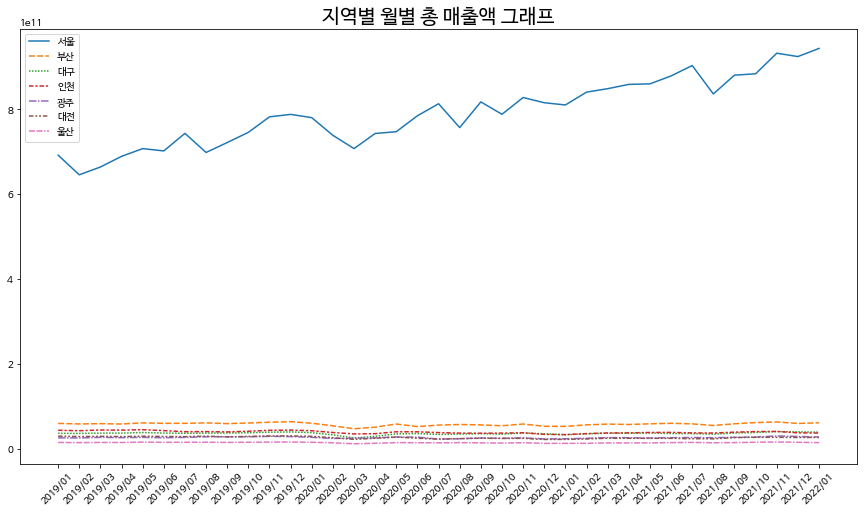

In [ ]:
plt.figure(figsize=(15,8))

sns.lineplot(data=dt)
plt.xticks(rotation=45)

plt.title('지역별 월별 총 매출액 그래프', fontsize=20)
plt.show()

서울 제외한 지역은 잘 구분되지 않으니

서울 / 그외 지역 분리해서 그래프 그리기

거리두기 기간 줄 그어서 구역 나타내기
- 거리두기 on : 2020년 3월 ~ 2022년 1월
- 거리두기 off : 2019년 1월 ~ 2020년 2월


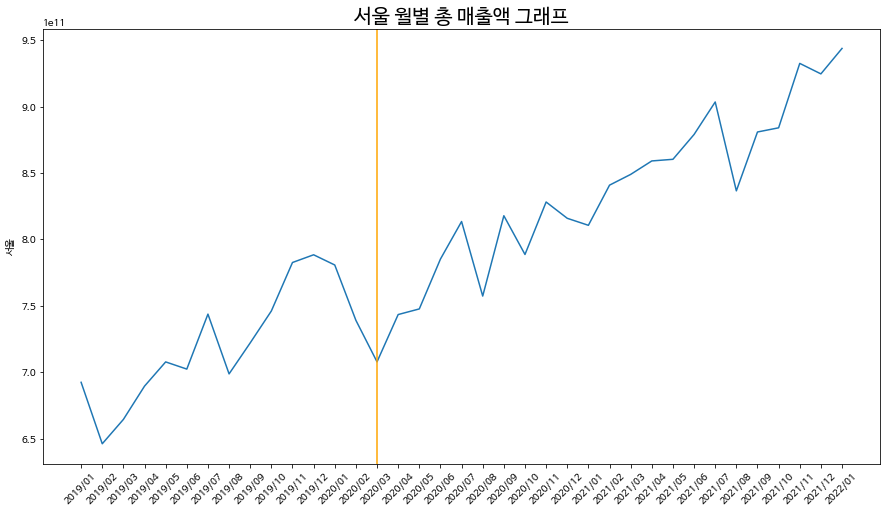

In [ ]:
# 서울

plt.figure(figsize=(15,8))

sns.lineplot(data=dt['서울'])
plt.xticks(rotation=45)
plt.axvline(x='2020/03', color='orange')

plt.title('서울 월별 총 매출액 그래프', fontsize=20)
plt.show()

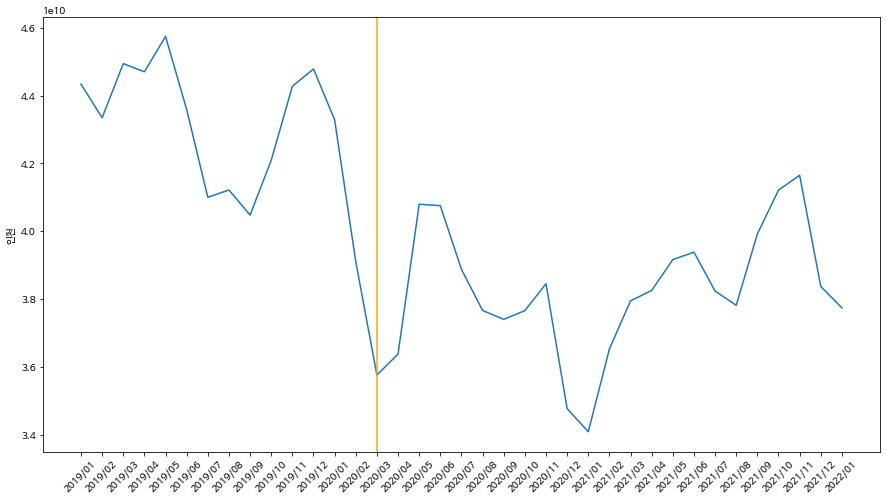

In [ ]:
#인천

plt.figure(figsize=(15,8))

sns.lineplot(data=dt['인천'])
plt.xticks(rotation=45)
plt.axvline(x='2020/03', color='orange')

plt.show()

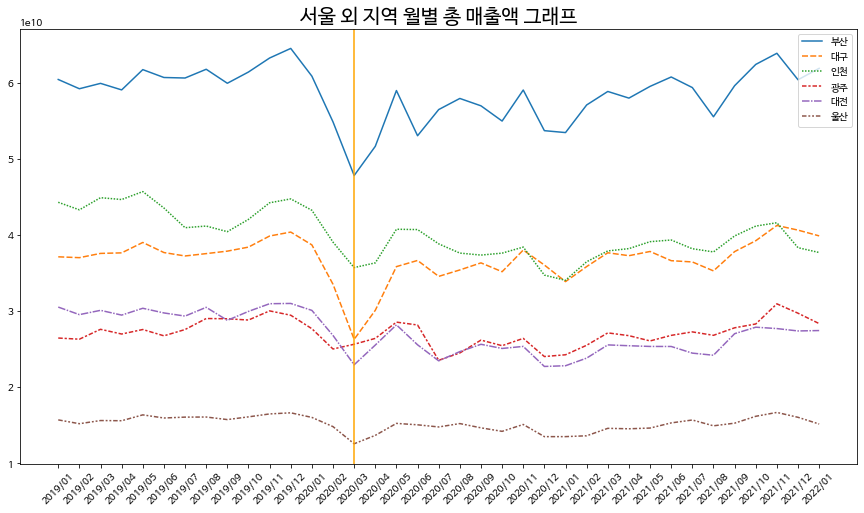

In [ ]:
# 서울 외 지역

dt_etc=dt.drop(columns=['서울'])

plt.figure(figsize=(15,8))

sns.lineplot(data=dt_etc)
plt.xticks(rotation=45)
plt.axvline(x='2020/03', color='orange')

plt.title('서울 외 지역 월별 총 매출액 그래프', fontsize=20)
plt.show()

모든 지역에서 3월 급감 후 우상향하는 경향 보임

--> 그렇다면 이동량은 어떨까? 3월 매출액이 급감했으니 이동량도 3월에 급감할까?

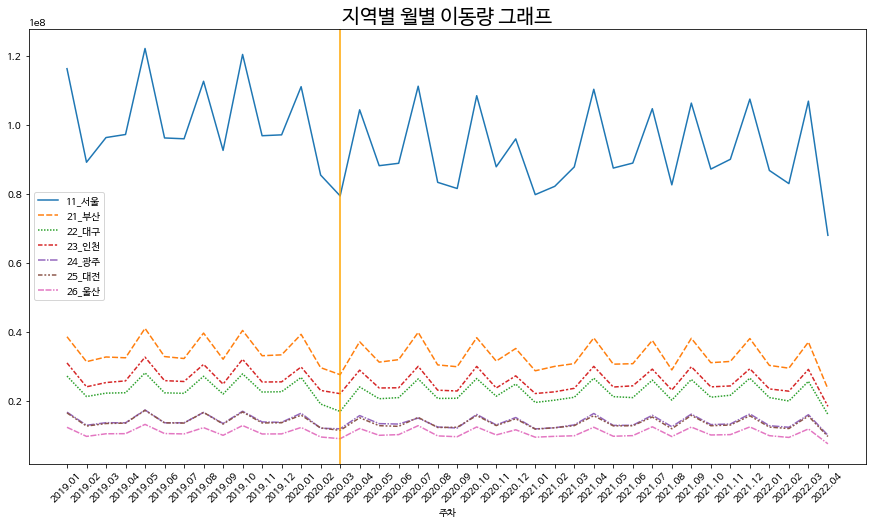

In [ ]:
# 이동량 시계열 그래프 그려보기

plt.figure(figsize=(15,8))

sns.lineplot(data=population_data)

plt.xticks(rotation=45)
plt.axvline(x='2020.03', color='orange')

plt.title('지역별 월별 이동량 그래프', fontsize=20)

plt.show()

모든 지역에서 2~3달마다 피크를 보임

2020년 3월을 기점으로 이동량의 변화가 있는지 알 수 없음

--> 이동량과 매출 사이의 상관관계 분석해보기

### 지역별 인구이동량 - 매출액 상관관계
- 매출액과 인구이동량 모두 많은 서울, 부산, 인천만 분석 진행
- 인구이동량-매출액 회귀 직선
- 인구이동량(population_data), 매출액(dt) 데이터 생성

In [ ]:
arr = population_data.reset_index()
arr.rename(columns={'주차':'연월'}, inplace=True)
arr['연월'] = arr['연월'].str.replace('.', '/')
arr.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


,연월,11_서울,21_부산,22_대구,23_인천,24_광주,25_대전,26_울산,29_세종,31_경기,32_강원,33_충북,34_충남,35_전북,36_전남,37_경북,38_경남,39_제주
0,2019/01,116464976,38632938,27216159,31026251,16739831,16520019,12339190,2530540,128019734,17073267,15963700,20929093,19379052,17905290,26793499,33312989,7859077
1,2019/02,89297808,31397267,21276522,24095811,12926448,12699516,9701515,1957618,99223704,13447826,12622804,16649075,15327660,14461970,21621342,26871731,6150548
2,2019/03,96465651,32754320,22256737,25331080,13677721,13440267,10461066,2094860,105980242,12983296,13170864,17289145,15732774,14833203,22081148,28033644,6419300
3,2019/04,97355118,32520129,22370385,25818234,13638789,13552383,10491024,2130247,108112005,13474054,13685120,18048685,16278741,15413255,22663812,28459884,6697988
4,2019/05,122326867,41067705,28138512,32705756,17367201,17271966,13184028,2747980,136456819,18073882,17401735,22960111,20965707,19555072,28849701,35890419,8502604


In [ ]:
dt.head()
arr2 = dt.reset_index()
arr2.rename(columns={'index':'연월'}, inplace=True)
arr2.head()

,연월,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,경북,경남,제주,기타
0,2019/01,692402589710,60490651664,37172559677,44341938368,26492270045,30563187645,15729616996,315712715824,23961077625,21116083647,34662306902,24456570928,21558136909,31433761110,43919108845,15735810968,9802333083
1,2019/02,646131736328,59272759267,37061108944,43349777337,26340583425,29570007975,15226625644,309545800355,23251125685,21160298351,34220897078,24327315549,21694553713,31569611788,43048390208,14937899002,9354608089
2,2019/03,664461126270,59980379632,37620516856,44947531359,27641291445,30133327888,15643768678,325519754121,22889216036,22309672498,36330496433,24446121611,22278685996,32356530510,44418260060,14959550090,9446857523
3,2019/04,689525761699,59120580169,37692555912,44705335290,27019448963,29507698695,15617458026,316981647913,22841358330,22705065401,37707943330,24581844043,22665596900,32841139027,44635535159,15691212066,9200913384
4,2019/05,707761418107,61787443520,39060827187,45749450378,27614070609,30406801841,16389110139,309767999542,25393904866,23998349188,39646689143,26131260050,23966687021,34670964324,46976307081,16214652114,11859756557


In [ ]:
arr = arr[:-3]
len(arr), len(arr2)

(37, 37)

In [ ]:
# 서울

seoul_data = pd.concat([arr['연월'],arr['11_서울'], arr2['서울']], axis=1)
seoul_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연월      37 non-null     object
 1   11_서울   37 non-null     int64 
 2   서울      37 non-null     object
dtypes: int64(1), object(2)
memory usage: 1016.0+ bytes


In [ ]:
seoul_data.rename(columns={'11_서울':'인구이동량', '서울':'매출량'}, inplace=True)
seoul_data.head()

,연월,인구이동량,매출량
0,2019/01,116464976,692402589710
1,2019/02,89297808,646131736328
2,2019/03,96465651,664461126270
3,2019/04,97355118,689525761699
4,2019/05,122326867,707761418107


In [ ]:
seoul_data['매출량'] = seoul_data['매출량'].astype(int)
seoul_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연월      37 non-null     object
 1   인구이동량   37 non-null     int64 
 2   매출량     37 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1016.0+ bytes


<Figure size 1080x576 with 0 Axes>

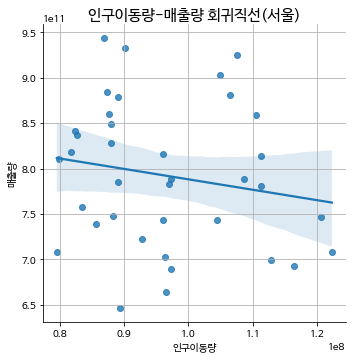

In [ ]:
plt.figure(figsize=(15,8))

sns.lmplot(x='인구이동량', y='매출량', data=seoul_data)
plt.grid()

plt.title('인구이동량-매출량 회귀직선(서울)', fontsize=15)
plt.show()

In [ ]:
# ols 함수 이용해서 회귀분석하기
from statsmodels.formula.api import ols

ols('매출량 ~ 인구이동량', data=seoul_data).fit().summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    매출량   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.102
Date:                Tue, 03 May 2022   Prob (F-statistic):              0.301
Time:                        02:19:59   Log-Likelihood:                -979.77
No. Observations:                  37   AIC:                             1964.
Df Residuals:                      35   BIC:                             1967.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.027e+11   1.06e+11      8.520      0.000    6.88e+11    1.12e+12
인구이동량      -1145.8021   1091.309     -1.050      0.301   -3361.278    1069.673
==============================================================================
Omnibus:                        1.105   Durbin-Watson:                   0.304
Prob(Omnibus):                  0.576   Jarque-Bera (JB):                0.933
Skew:                           0.131   Prob(JB):                        0.627
Kurtosis:                       2.268   Cond. No.                     7.95e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.95e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- adj.R-squared=0.0003 : 인구이동량이 매출량을 설명한다고 보기는 매우 어려움
- p-value = 0.301 : 전혀 유의하지 않음... 인구이동량이 매출량을 설명하는 변수가 아님 전혀 아님

In [ ]:
# 인천

incheon_data = pd.concat([arr['연월'],arr['23_인천'], arr2['경기']], axis=1)
incheon_data.rename(columns={'23_인천':'인구이동량', '경기':'매출량'}, inplace=True)
incheon_data['매출량'] = incheon_data['매출량'].astype(int)

In [ ]:
incheon_data.head()

,연월,인구이동량,매출량
0,2019/01,31026251,315712715824
1,2019/02,24095811,309545800355
2,2019/03,25331080,325519754121
3,2019/04,25818234,316981647913
4,2019/05,32705756,309767999542


<Figure size 1080x576 with 0 Axes>

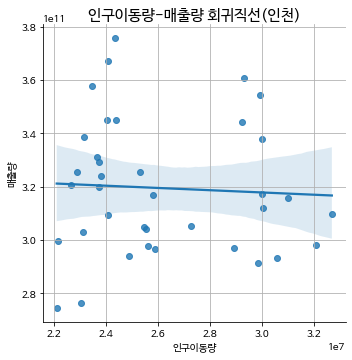

In [ ]:
plt.figure(figsize=(15,8))

sns.lmplot(x='인구이동량', y='매출량', data=incheon_data)
plt.grid()

plt.title('인구이동량-매출량 회귀직선(인천)', fontsize=15)
plt.show()

In [ ]:
ols('매출량 ~ 인구이동량', data=incheon_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    매출량   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                    0.1009
Date:                Tue, 03 May 2022   Prob (F-statistic):              0.753
Time:                        04:05:00   Log-Likelihood:                -937.66
No. Observations:                  37   AIC:                             1879.
Df Residuals:                      35   BIC:                             1883.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.305e+11    3.5e+10      9.438      0.000    2.59e+11    4.02e+11
인구이동량       -422.2083   1329.130     -0.318      0.753   -3120.485    2276.068
==============================================================================
Omnibus:                        1.253   Durbin-Watson:                   0.232
Prob(Omnibus):                  0.534   Jarque-Bera (JB):                1.234
Skew:                           0.384   Prob(JB):                        0.540
Kurtosis:                       2.543   Cond. No.                     2.23e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

경기 역시 서울과 마찬가지로 adj.R-squared=0.03, p-value=0.301로 인구이동량과 매출액 사이에 유의한 관계가 있다고 보기는 무리임

In [ ]:
# 부산

busan_data = pd.concat([arr['연월'],arr['21_부산'], arr2['부산']], axis=1)
busan_data.rename(columns={'21_부산':'인구이동량', '부산':'매출량'}, inplace=True)
busan_data['매출량'] = busan_data['매출량'].astype(int)

In [ ]:
busan_data.head()

,연월,인구이동량,매출량
0,2019/01,38632938,60490651664
1,2019/02,31397267,59272759267
2,2019/03,32754320,59980379632
3,2019/04,32520129,59120580169
4,2019/05,41067705,61787443520


<Figure size 1080x576 with 0 Axes>

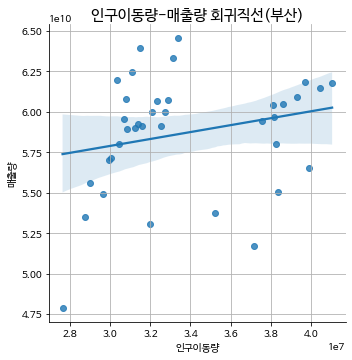

In [ ]:
plt.figure(figsize=(15,8))

sns.lmplot(x='인구이동량', y='매출량', data=busan_data)
plt.grid()

plt.title('인구이동량-매출량 회귀직선(부산)', fontsize=15)
plt.show()

In [ ]:
ols('매출량 ~ 인구이동량', data=busan_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    매출량   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     2.031
Date:                Tue, 03 May 2022   Prob (F-statistic):              0.163
Time:                        02:20:01   Log-Likelihood:                -864.96
No. Observations:                  37   AIC:                             1734.
Df Residuals:                      35   BIC:                             1737.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.149e+10   5.09e+09     10.112      0.000    4.12e+10    6.18e+10
인구이동량        213.7253    149.984      1.425      0.163     -90.759     518.210
==============================================================================
Omnibus:                        5.191   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                3.908
Skew:                          -0.761   Prob(JB):                        0.142
Kurtosis:                       3.466   Cond. No.                     2.97e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.97e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 거리두기 기간 내 이동량, 매출 회귀직선 그래프

거리두기 on : 2020년 3월 ~ 2022년 1월

In [ ]:
# 거리두기 기간 데이터 추출 후 이동량-매출량 회귀 그래프 다시 그려보기

# 서울

seoul_distance = seoul_data.loc[14:]
seoul_distance

,연월,인구이동량,매출량
14,2020/03,79528133,707828333598
15,2020/04,104520787,743419546783
16,2020/05,88295610,747654769642
17,2020/06,88996348,785181625946
18,2020/07,111374898,813454906766
19,2020/08,83461312,757337368760
20,2020/09,81671834,817811462777
21,2020/10,108615845,788660422577
22,2020/11,87977782,828155636101
23,2020/12,96070306,815883245789


<Figure size 1080x576 with 0 Axes>

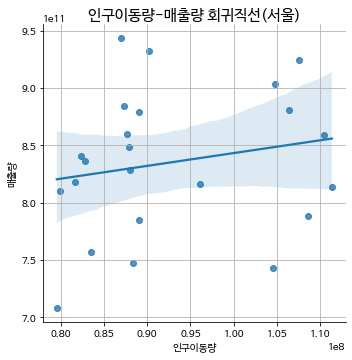

In [ ]:
plt.figure(figsize=(15,8))

sns.lmplot(x='인구이동량', y='매출량', data=seoul_distance)
plt.grid()

plt.title('인구이동량-매출량 회귀직선(서울)', fontsize=15)
plt.show()

In [ ]:
ols('매출량 ~ 인구이동량', data=seoul_distance).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    매출량   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.8045
Date:                Tue, 03 May 2022   Prob (F-statistic):              0.380
Time:                        02:20:02   Log-Likelihood:                -603.52
No. Observations:                  23   AIC:                             1211.
Df Residuals:                      21   BIC:                             1213.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.317e+11   1.16e+11      6.302      0.000     4.9e+11    9.73e+11
인구이동량       1115.3700   1243.565      0.897      0.380   -1470.764    3701.504
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   0.286
Prob(Omnibus):                  0.867   Jarque-Bera (JB):                0.465
Skew:                          -0.094   Prob(JB):                        0.793
Kurtosis:                       2.330   Cond. No.                     8.25e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.25e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
incheon_distance = incheon_data.loc[14:]
incheon_distance

,연월,인구이동량,매출량
14,2020/03,22108326,274415838495
15,2020/04,28925780,296858455838
16,2020/05,23754347,319817781977
17,2020/06,23814257,324196001893
18,2020/07,30040350,312187337836
19,2020/08,23115355,303216308455
20,2020/09,22879455,325490653953
21,2020/10,30017065,317284929997
22,2020/11,23754210,329236296254
23,2020/12,27278630,305327768943


<Figure size 1080x576 with 0 Axes>

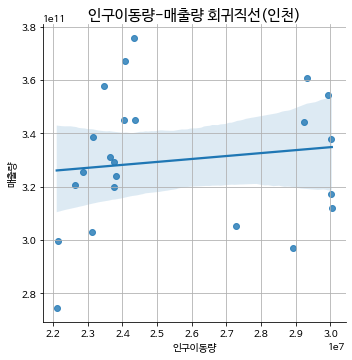

In [ ]:
plt.figure(figsize=(15,8))

sns.lmplot(x='인구이동량', y='매출량', data=incheon_distance)
plt.grid()

plt.title('인구이동량-매출량 회귀직선(인천)', fontsize=15)
plt.show()

In [ ]:
ols('매출량 ~ 인구이동량', data=incheon_distance).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    매출량   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.029
Method:                 Least Squares   F-statistic:                    0.3747
Date:                Tue, 03 May 2022   Prob (F-statistic):              0.547
Time:                        04:21:07   Log-Likelihood:                -582.59
No. Observations:                  23   AIC:                             1169.
Df Residuals:                      21   BIC:                             1171.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.017e+11   4.64e+10      6.505      0.000    2.05e+11    3.98e+11
인구이동량       1106.5670   1807.825      0.612      0.547   -2653.012    4866.146
==============================================================================
Omnibus:                        0.090   Durbin-Watson:                   0.369
Prob(Omnibus):                  0.956   Jarque-Bera (JB):                0.299
Skew:                          -0.084   Prob(JB):                        0.861
Kurtosis:                       2.467   Cond. No.                     2.25e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
busan_distance = busan_data.loc[14:]
busan_distance

,연월,인구이동량,매출량
14,2020/03,27622267,47861631867
15,2020/04,37175072,51702222708
16,2020/05,31260302,59036911710
17,2020/06,31982035,53093445241
18,2020/07,39902868,56535154123
19,2020/08,30457061,57997136403
20,2020/09,29923195,57027398117
21,2020/10,38363262,55024779753
22,2020/11,31567369,59105678731
23,2020/12,35224005,53760216463


<Figure size 1080x576 with 0 Axes>

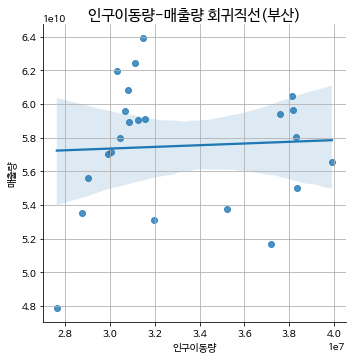

In [ ]:
plt.figure(figsize=(15,8))

sns.lmplot(x='인구이동량', y='매출량', data=busan_distance)
plt.grid()

plt.title('인구이동량-매출량 회귀직선(부산)', fontsize=15)
plt.show()

In [ ]:
ols('매출량 ~ 인구이동량', data=busan_distance).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    매출량   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.045
Method:                 Least Squares   F-statistic:                   0.05495
Date:                Tue, 03 May 2022   Prob (F-statistic):              0.817
Time:                        02:20:05   Log-Likelihood:                -539.26
No. Observations:                  23   AIC:                             1083.
Df Residuals:                      21   BIC:                             1085.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.585e+10   7.13e+09      7.837      0.000     4.1e+10    7.07e+10
인구이동량         50.3236    214.678      0.234      0.817    -396.123     496.771
==============================================================================
Omnibus:                        2.215   Durbin-Watson:                   0.819
Prob(Omnibus):                  0.330   Jarque-Bera (JB):                1.305
Skew:                          -0.582   Prob(JB):                        0.521
Kurtosis:                       3.078   Cond. No.                     2.94e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.94e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""